# Project Name:-Human Activity Recognition Using Smartphones

In [1]:
#General useful packages
import pandas as pd
import numpy as np
#for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

**numpy and pandas:** Numpy enables us to work with arrays with great efficiency. Pandas is used to read the dataset file and import it as a dataframe, which is similar to a table with rows and columns.

**matplotlib:** Matplotlib is a highly customisable package which has the subpackage pyplot that enables us to draw plots, bar charts, pie charts and more. We get options to add legends, axis titles, change thickness of lines etc. The cm package (colormap) allows us to get colors for our charts.

**sklearn:** This machine learning library includes numerous machine learning algorithms already builtin with certain parameters set as default parameters, so they work right out of the box.

In [4]:
#import all ML Algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Accuracy score
from sklearn.metrics import accuracy_score

**Support Vector Machine**-Support vector machine (SVM) is supervised machine learning algorithm which can be used both for classification and regression problems. But generally, it is used in classification problems

**LogisticRegression**-It is a classification algorithm in machine learning that uses one or more independent variables to determine an outcome. The outcome is measured with a dichotomous variable meaning it will have only two possible outcomes. The goal of logistic regression is to find a best-fitting relationship between the dependent variable and a set of independent variables. 

**K-Nearest Neighbor**-It is a lazy learning algorithm that stores all instances corresponding to training data in n-dimensional space. It is a lazy learning algorithm as it does not focus on constructing a general internal model, instead, it works on storing instances of training data.

**Random Forest Classifier**-random forest are an ensemble learning method for classification, regression, etc. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes or classification or mean prediction(regression) of the individual trees.

**Accuracy score**-Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.

# Distinguish DataSet

In [5]:
training_data=pd.read_csv('train.csv')
testing_data=pd.read_csv('test.csv')

In [14]:
print('Training data')
training_data.shape

Training data 

(7352, 563)

In [15]:
print("Null values present in training data:")
training_data.isnull().values.any()

Null values present in training data:

False

In [16]:
print('Testing data')
testing_data.shape

Testing data


(2947, 563)

In [17]:
print("Null values present in testing data:")
testing_data.isnull().values.any()

Null values present in testing data:


False

In [18]:
training_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [19]:
testing_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


**We see there are 563 columns with the last column as Activity which will act as our label. In the remaining columns, subject is of no specific use for our machine learning application as we want to explore the activity and not who performed it. We can drop this column and the remaining 561 columns will be our features. Same will be done for the testing data.**

In [21]:
#Training data variables
y_train=training_data['Activity']
X_train=training_data.drop(columns=['Activity','subject'])

In [22]:
#Testing data variables
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

# Visualize the dataset

* We first get the count of records for each type of activity in a variable. value_counts() gives the counts.The counts are presented in alphabetical order of the name of the activity.

* unique() gives us unique values in y_train. We must sort it so that they align with the count values gathered above. The rcParams helps us define certain styles for out chart. We define the figure size using figure.figsize and the font size using font.size.

* We now have our data ready for the pie chart. pie() method creates a pie chart. The first argument is the count for each activity, the second argument is the respective activity name denoted by labels and the third argument autopct computes percentages for each activity.

([<matplotlib.patches.Wedge at 0xfc37fb0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

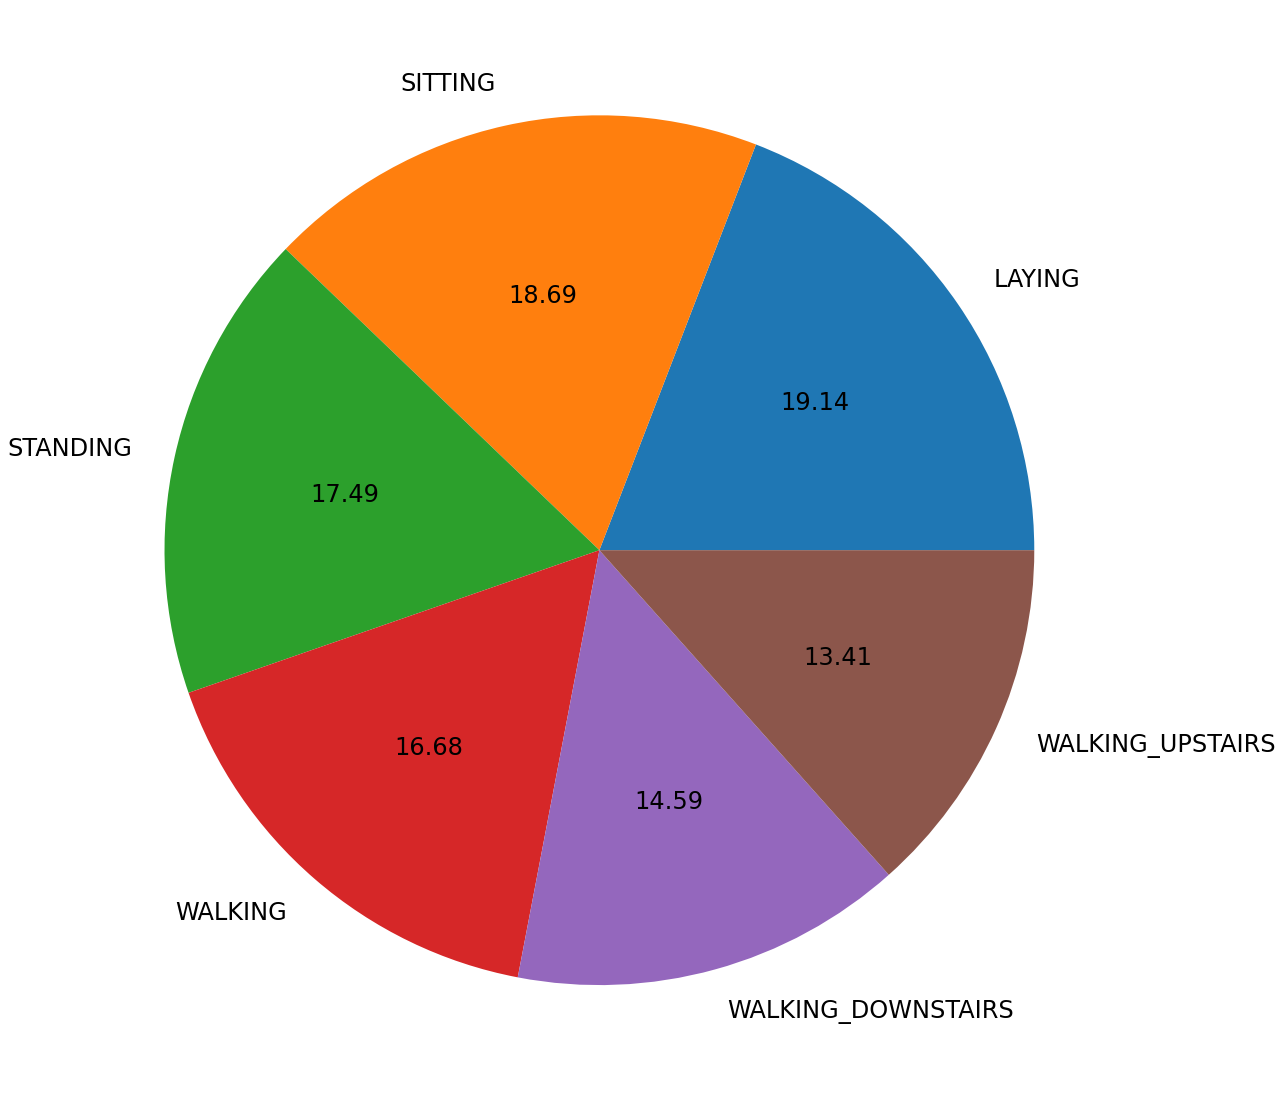

In [23]:
count_of_each_activity = np.array(y_train.value_counts())

activities = sorted(y_train.unique())

plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

* **Next,I observe the type of readings in the datatset. If you look at the column headings, you can see that the columns have either the text refer to accelerometer reading,gyroscope values or none of the two to refer to all others.**

* **I first iterate through column names, to check if they contain ‘Acc’ or ‘Gyro’ or not. Based on the variable values, I plot a bar plot using bar() method of pyplot subpackage. The first argument are the X axis labels, the second argument takes the array of Y axis values and the color argument defines the colors red, blue and green respectively for the three bars. I again defined the figure size and font size for this bar plot**

<BarContainer object of 3 artists>

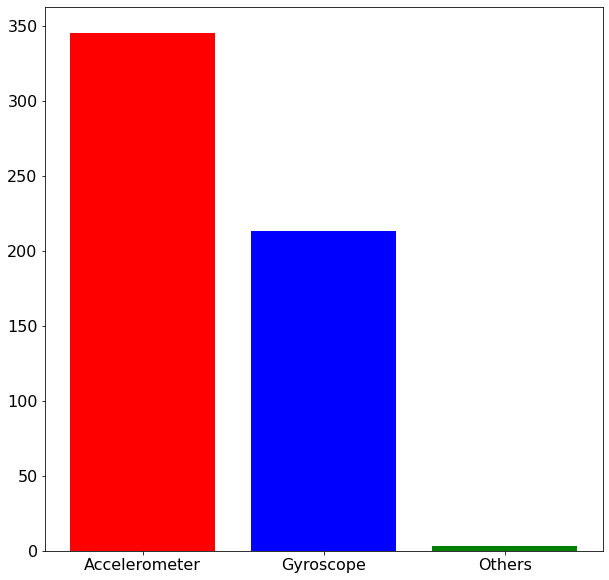

In [24]:
acc = 0
gyro = 0
others = 0
for column in X_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))


# Data Analysis

* The data collected is recorded at a stretch for each individual, especially for each activity. This means the records of any given activity will actually be in time series.

* I decided that I’d plot a line graph for all individuals who performed the Standing activity over a time period with respect to a feature. I took the feature as the angle between X and mean Gravity

**selecting all rows from the dataset that have the ‘Activity’ label as ‘STANDING’ and store it in standing_activity**

In [25]:
standing_activity = training_data[training_data['Activity'] == 'STANDING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)

**The data collected is in continuous time series for each individual and was recorded at the same rate. So, I can simply assign time values to each activity starting from '0' each time the subject changes. For each subject, the Standing activity records will start with a time value of 0 and increment by 1 till the previous row’s subject matches the present row’s subject.** 

**I store all the time series in a variable time_series and convert it into a dataframe using pandas method DataFrame() and store it in a variable time_series_df**


In [26]:
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

# Combine the time_series with the standing_activity dataframe
time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

* Now, as the data is ready to be plot, I use the matplotlib’s cm subpackage to get a list of colors using the rainbow metho

* iterate over the list of subjects inside the standing_activity_df. I specify size of the graph using rcParams. In the plot method, the first argument is X-axis values which is Time column in our case. The second column is for Y-axis values so I input the angle(X, gravityMean) values.

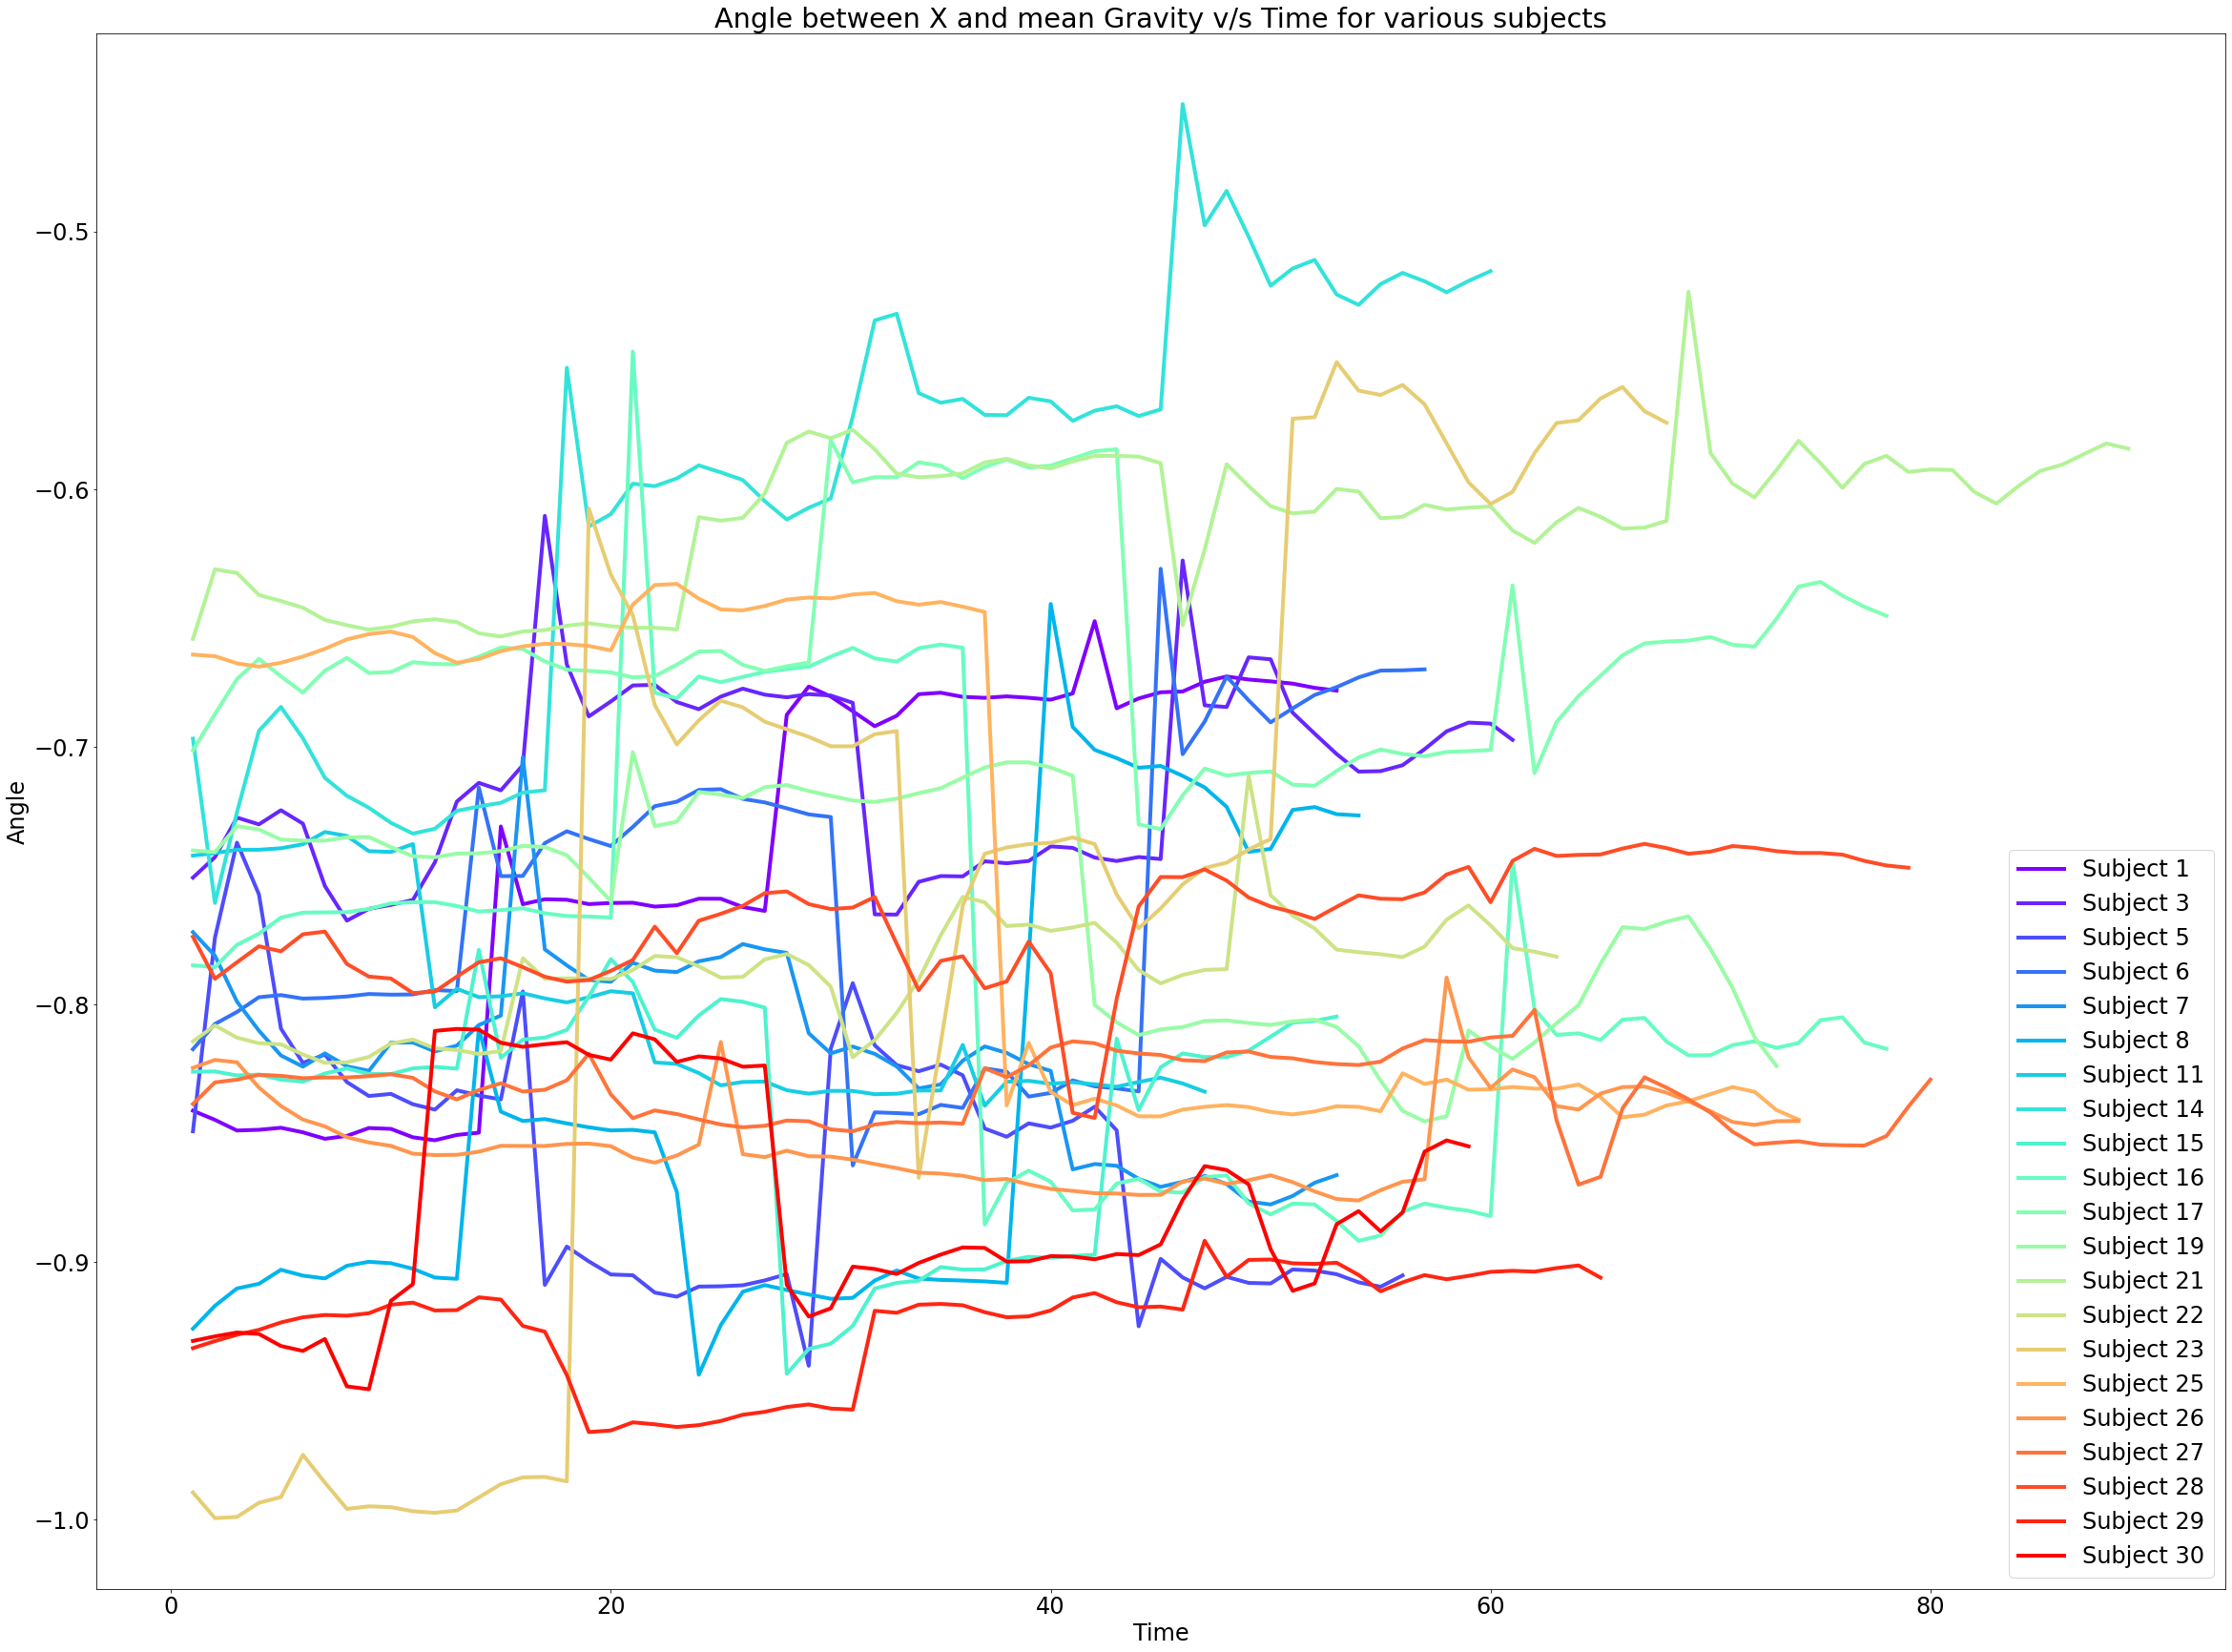

In [27]:
colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

# ML Algorithm
**Now comes the final step in our process to actually use machine learning algorithms and make classifications.**

In [28]:
accuracy_scores = np.zeros(4)

**array of zeros of size 4 to store accuracy for each algorithm**

# SVM

In [29]:
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

Support Vector Classifier accuracy: 95.04580929759076%


# Logistic Regression

In [30]:
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

Logistic Regression accuracy: 95.79233118425518%


d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# KNN

In [31]:
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

K Nearest Neighbors Classifier accuracy: 90.02375296912113%


# Random Forest

In [32]:
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Random Forest Classifier accuracy: 92.46691550729555%


* **visualise the outputs as a bar graph.**

Text(0.5, 1.0, 'Accuracy of various algorithms')

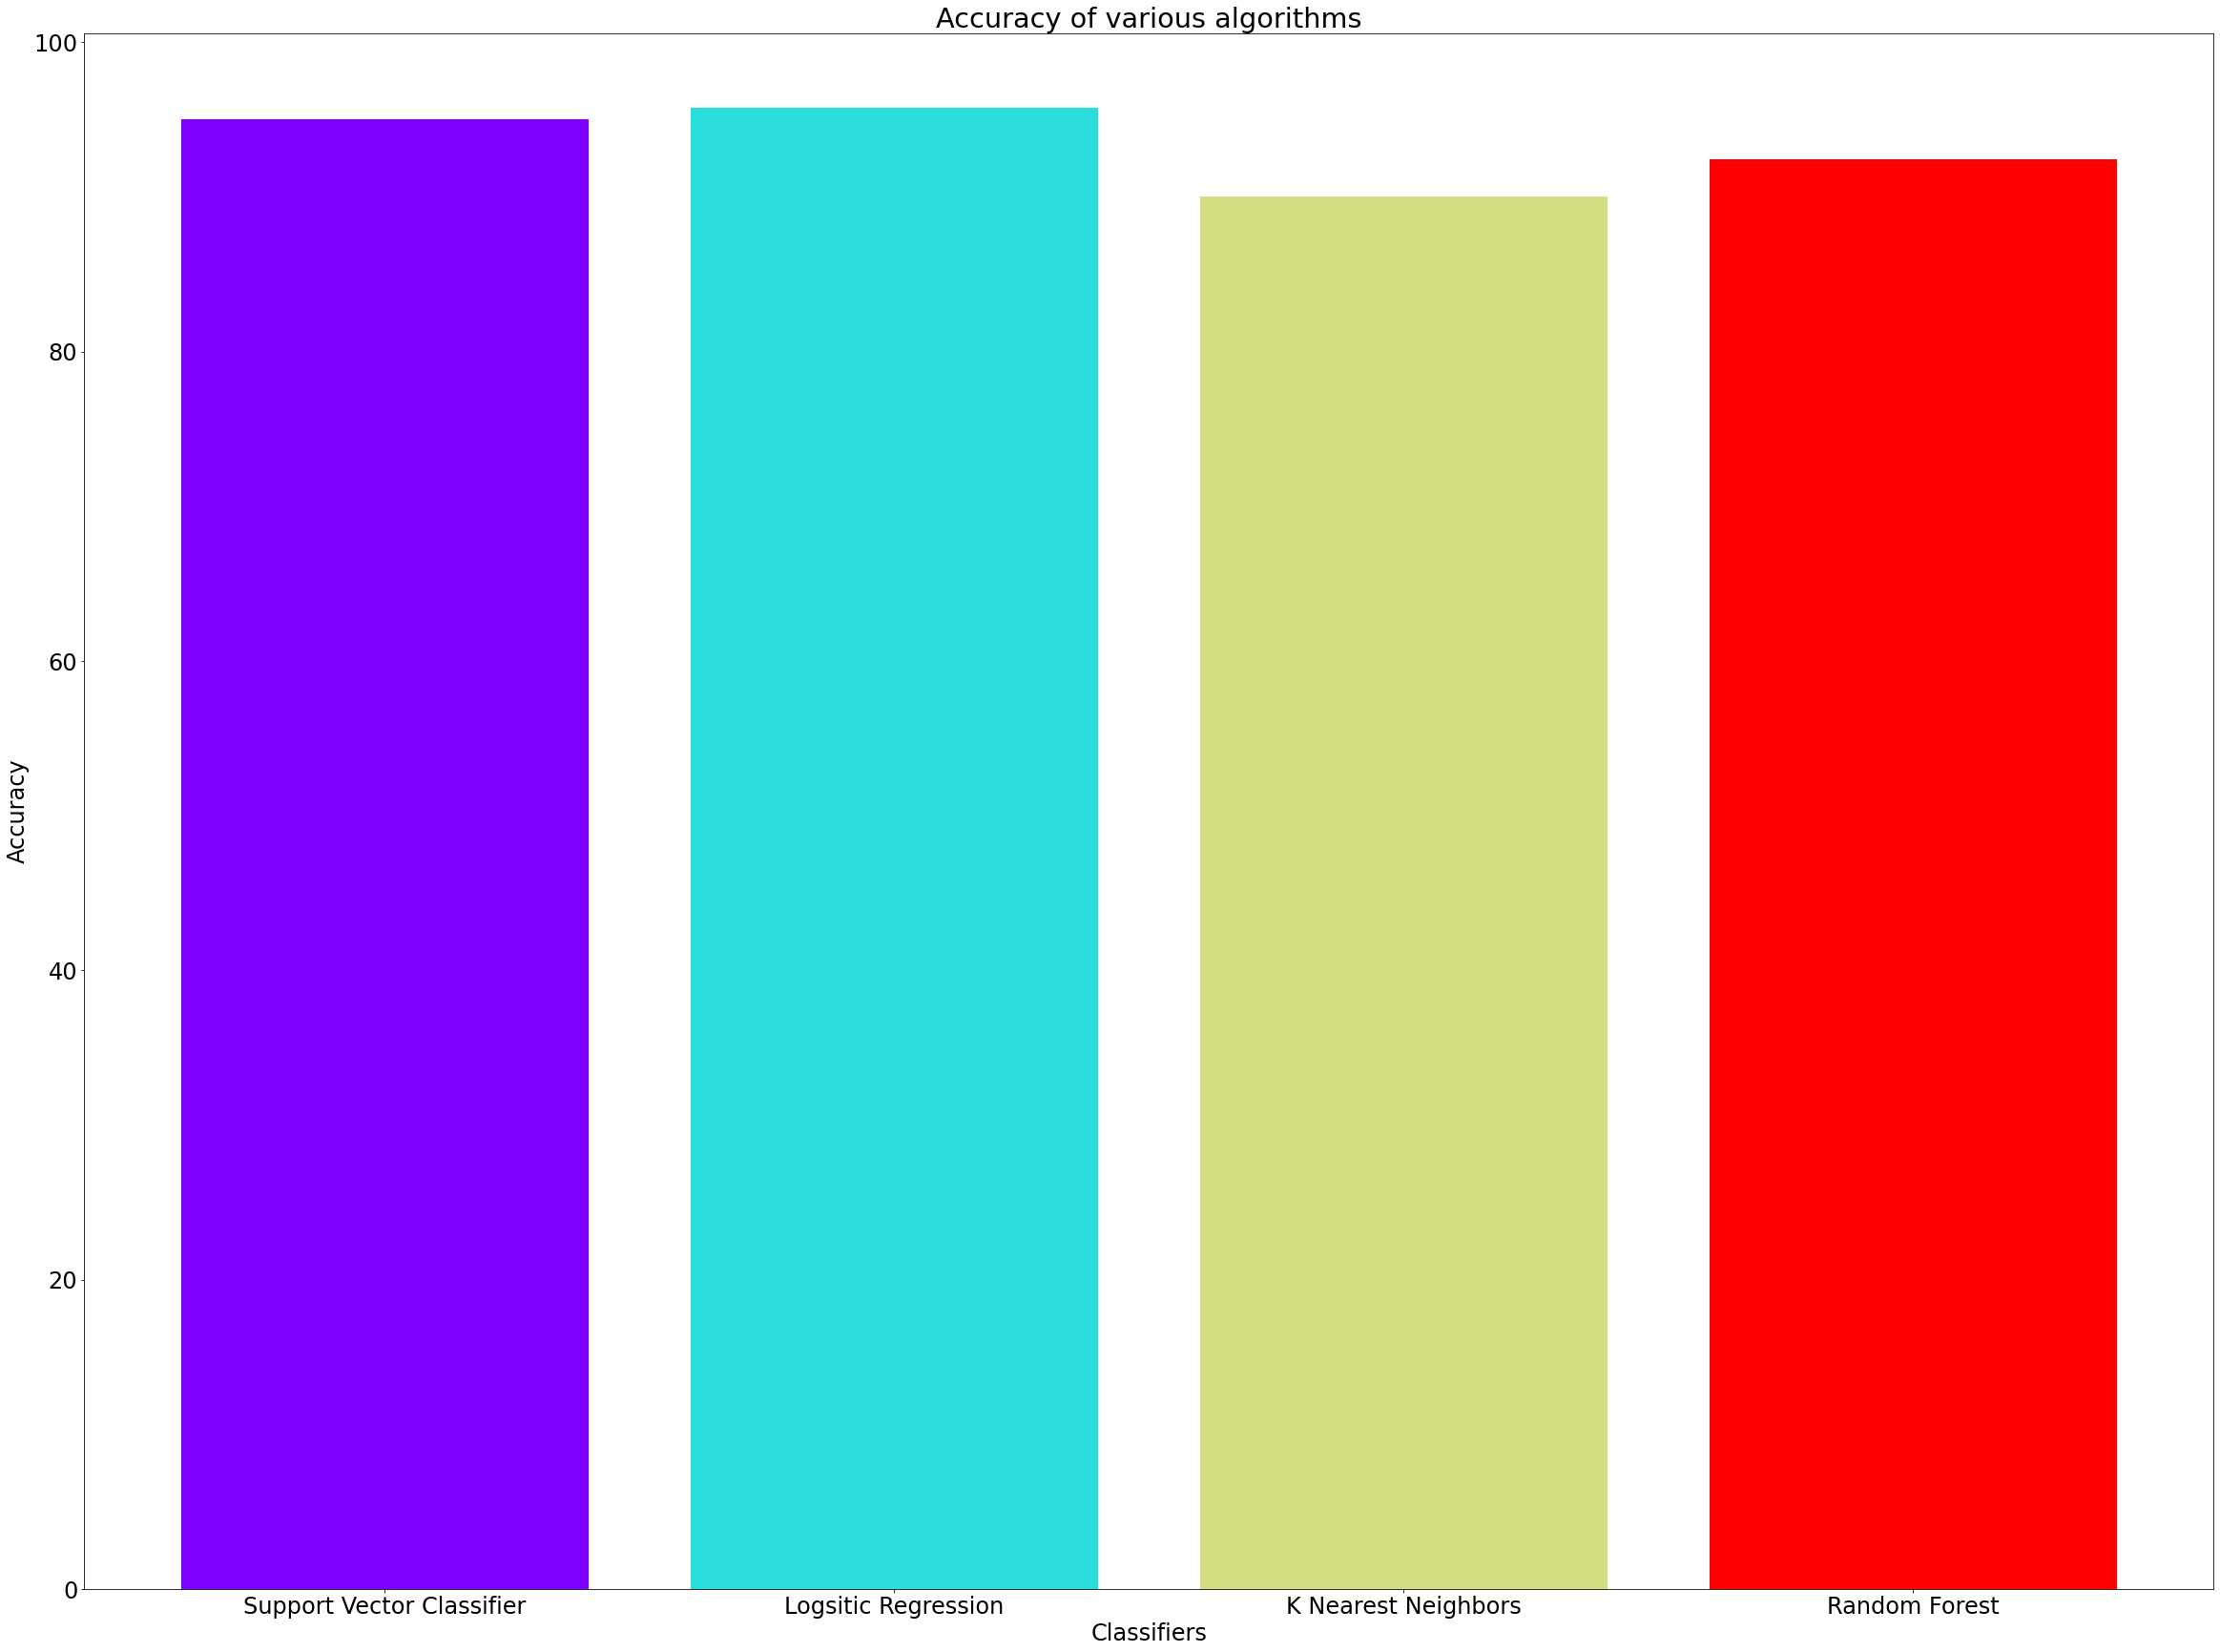

In [33]:
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

**we can see from the output values above, the Logistic Regression algorithm performed the best with the accuracy of over 96%.**

# Group members:
* Kushwanath Boina
* G Namrata Sai 
* MD. Jahid Hasan
* Simina Mannan Trisha